In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df_drop = df.drop(columns=['name'])

In [7]:
df_drop.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<Axes: >

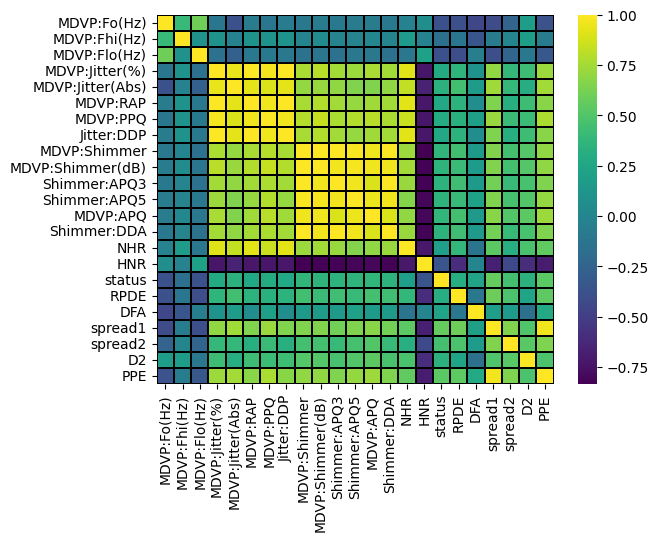

In [8]:
sns.heatmap(df_drop.corr(),cmap='viridis',linecolor='black',linewidths=0.3)

<Axes: xlabel='status', ylabel='MDVP:Fo(Hz)'>

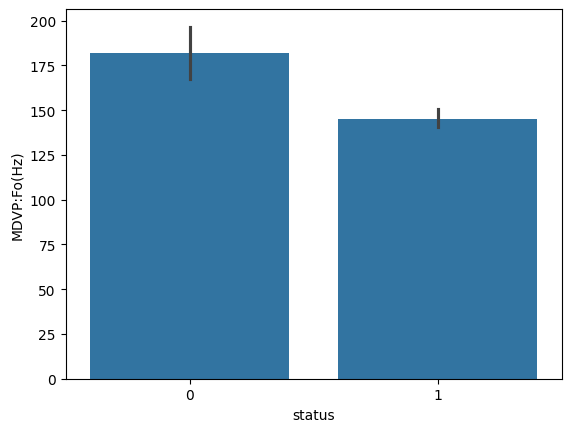

In [9]:
sns.barplot(data=df,x='status',y='MDVP:Fo(Hz)')

<Axes: xlabel='PPE', ylabel='MDVP:Fo(Hz)'>

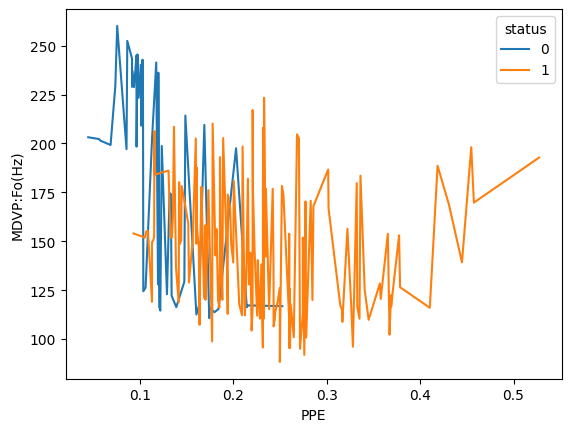

In [10]:
sns.lineplot(data=df,x='PPE',hue='status',y='MDVP:Fo(Hz)')

<Axes: xlabel='MDVP:Shimmer', ylabel='Jitter:DDP'>

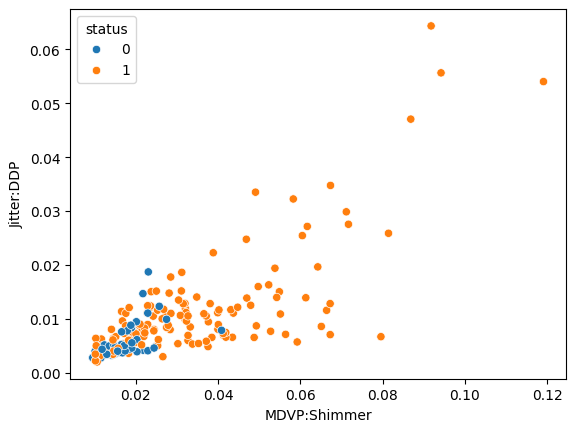

In [11]:
sns.scatterplot(x=df['MDVP:Shimmer'],y=df['Jitter:DDP'],hue=df['status'])

<Axes: xlabel='PPE', ylabel='spread1'>

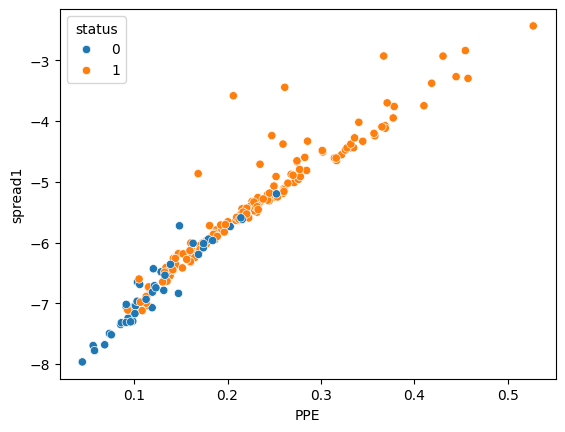

In [12]:
sns.scatterplot(x=df['PPE'],y=df['spread1'],hue=df['status'])


<Axes: xlabel='DFA', ylabel='PPE'>

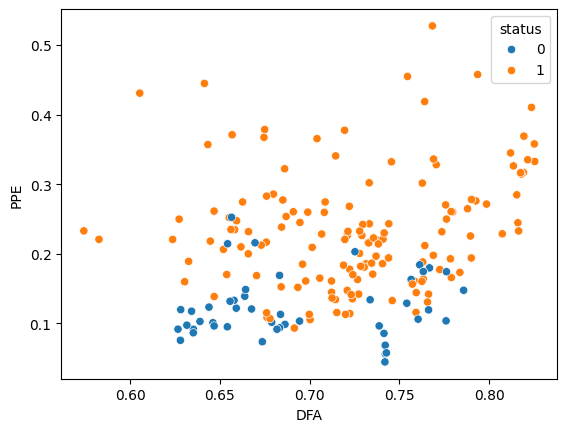

In [13]:
sns.scatterplot(x=df['DFA'],y=df['PPE'],hue=df['status'])

<Axes: xlabel='Jitter:DDP', ylabel='MDVP:RAP'>

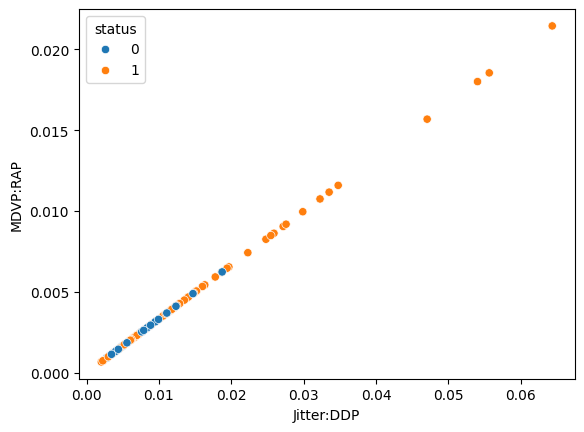

In [14]:
sns.scatterplot(x=df['Jitter:DDP'],y=df['MDVP:RAP'],hue=df['status'])

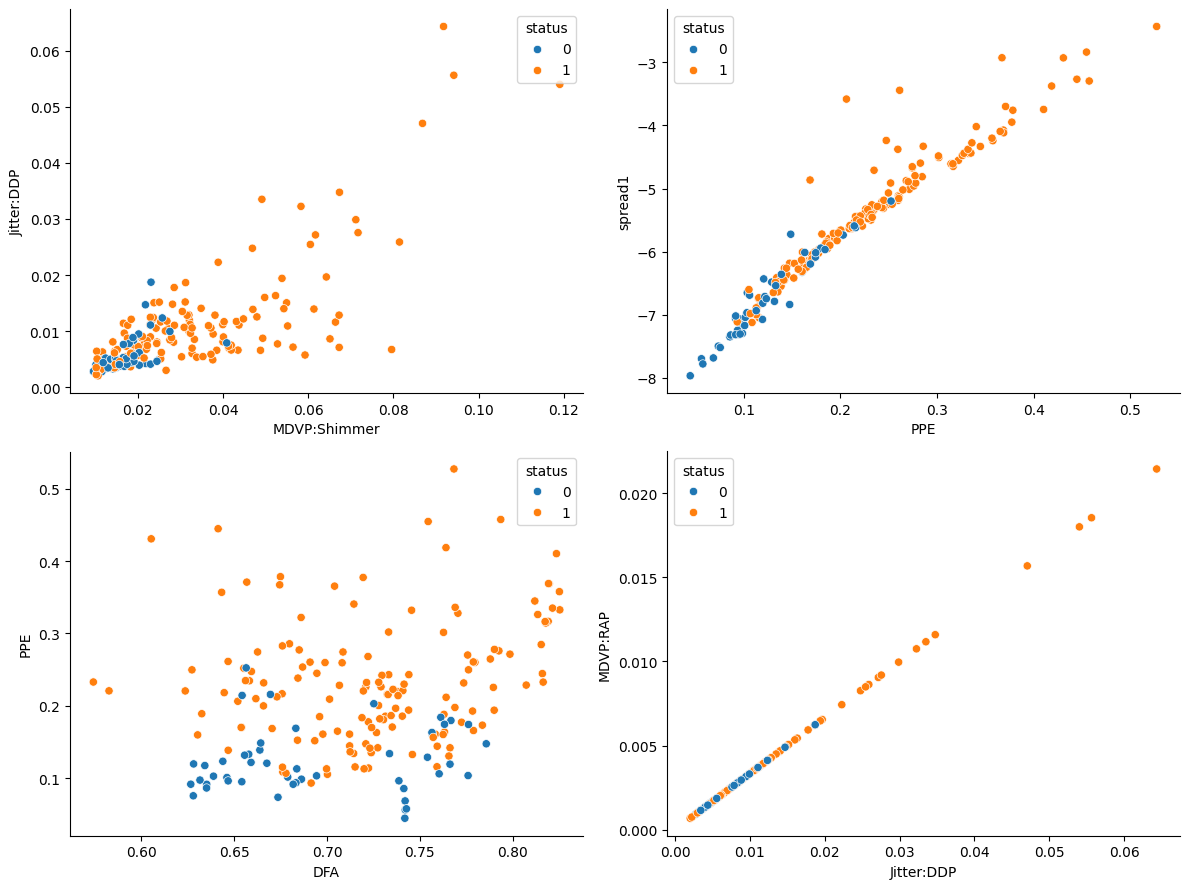

In [15]:
fig,ax= plt.subplots(2,2,figsize=(12,9))
sns.scatterplot(x=df['MDVP:Shimmer'],y=df['Jitter:DDP'],hue=df['status'],ax=ax[0,0])
sns.scatterplot(x=df['PPE'],y=df['spread1'],hue=df['status'],ax=ax[0,1]),
sns.scatterplot(x=df['DFA'],y=df['PPE'],hue=df['status'],ax=ax[1,0])
sns.scatterplot(x=df['Jitter:DDP'],y=df['MDVP:RAP'],hue=df['status'],ax=ax[1,1])
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\agamb\AppData\Local\Temp\ipykernel_3568\2158166275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x=df['status'],y=df['MDVP:Fo(Hz)'],ax=ax[0,0],
C:\Users\agamb\AppData\Local\Temp\ipykernel_3568\2158166275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x=df['status'],y=df['MDVP:Fhi(Hz)'],ax=ax[0,1],palette='coolwarm')
C:\Users\agamb\AppData\Local\Temp\ipykernel_3568\2158166275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x=df['status'],y=df['MDVP:Flo(Hz)'],ax=ax[1,0],palette='coolwarm')
C:\Use

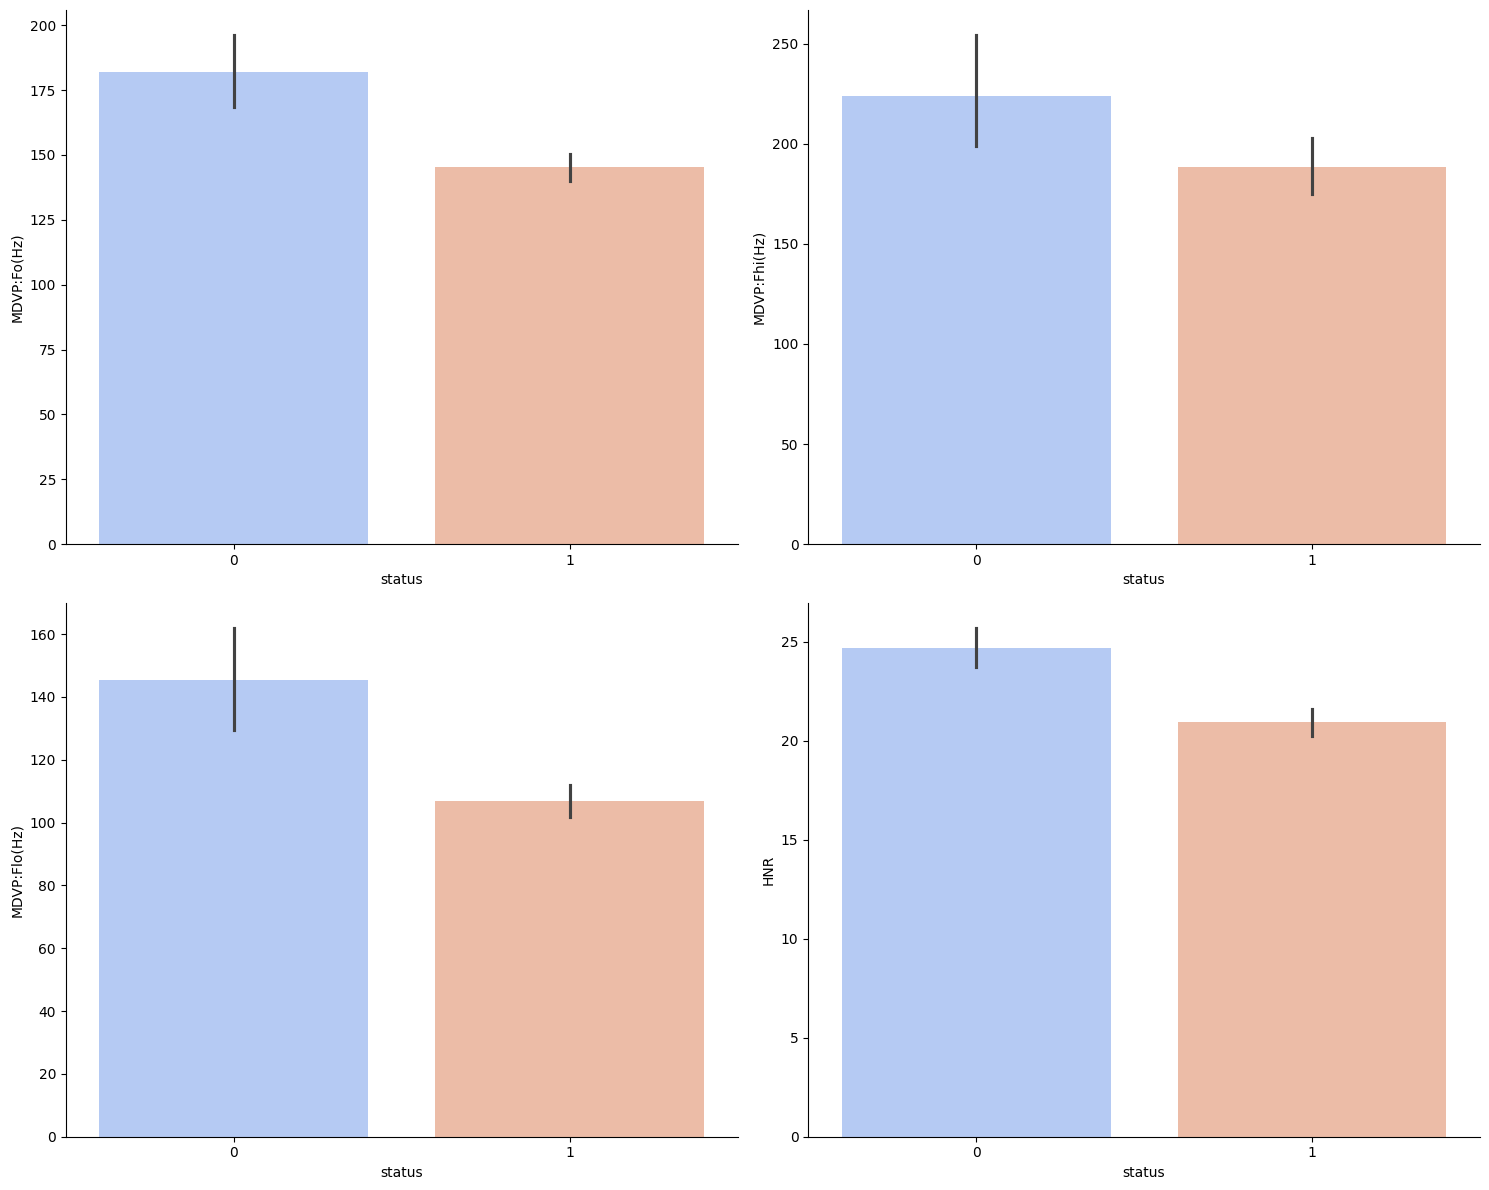

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(15,12))
sns.barplot(data=df,x=df['status'],y=df['MDVP:Fo(Hz)'],ax=ax[0,0],
palette='coolwarm')
sns.barplot(data=df,x=df['status'],y=df['MDVP:Fhi(Hz)'],ax=ax[0,1],palette='coolwarm')
sns.barplot(data=df,x=df['status'],y=df['MDVP:Flo(Hz)'],ax=ax[1,0],palette='coolwarm')
sns.barplot(data=df,x=df['status'],y=df['HNR'],ax=ax[1,1],palette='coolwarm')
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\agamb\AppData\Local\Temp\ipykernel_3568\3588474378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x=df['status'],y=df['PPE'],ax=ax[0,0],palette='viridis')
C:\Users\agamb\AppData\Local\Temp\ipykernel_3568\3588474378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x=df['status'],y=df['spread1'],ax=ax[0,1],palette='viridis')
C:\Users\agamb\AppData\Local\Temp\ipykernel_3568\3588474378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x=df['status'],y=df['spread2'],ax=ax[1,0],palette='viridis')
C:\Users

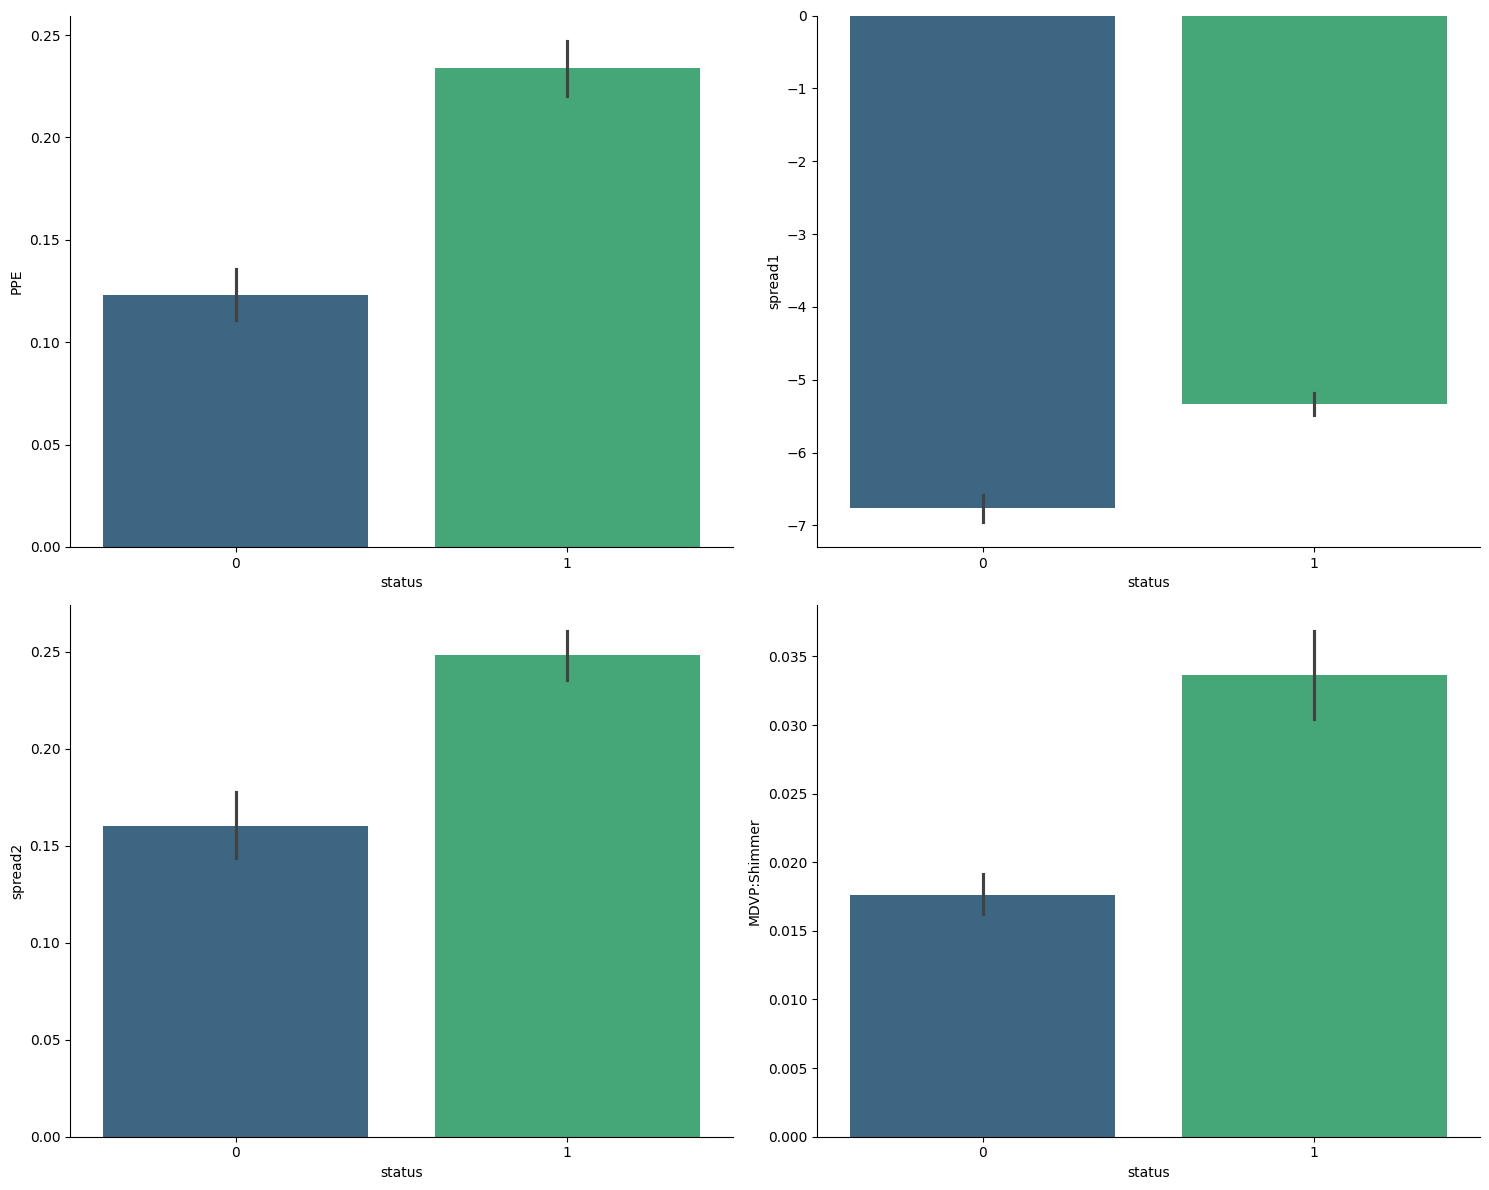

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(15,12))
sns.barplot(data=df,x=df['status'],y=df['PPE'],ax=ax[0,0],palette='viridis')
sns.barplot(data=df,x=df['status'],y=df['spread1'],ax=ax[0,1],palette='viridis')
sns.barplot(data=df,x=df['status'],y=df['spread2'],ax=ax[1,0],palette='viridis')
sns.barplot(data=df,x=df['status'],y=df['MDVP:Shimmer'],ax=ax[1,1],palette='viridis')
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
x = df_drop.drop(columns='status')
y = df_drop['status']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
standardised = scaler.fit_transform(x)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(standardised ,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred = model.predict(x_test)

In [23]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification report:")
print(classification_report(y_test,y_pred))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred))

confusion matrix:
[[ 3  4]
 [ 0 32]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Accuracy score:
0.8974358974358975


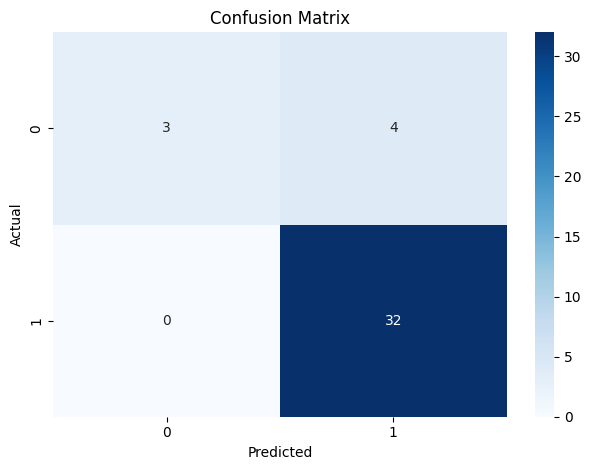

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
model2.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
y_pred2 = model2.predict(x_test)

In [35]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred2))
print("Classification report:")
print(classification_report(y_test,y_pred2))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred2))

confusion matrix:
[[ 5  2]
 [ 0 32]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Accuracy score:
0.9487179487179487


In [36]:
from sklearn.ensemble import RandomForestClassifier
model_ensemble = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=42)
model_ensemble.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred_ensemble = model_ensemble.predict(x_test)

In [38]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred_ensemble))
print("Classification report:")
print(classification_report(y_test,y_pred_ensemble))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred_ensemble))

confusion matrix:
[[ 5  2]
 [ 0 32]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Accuracy score:
0.9487179487179487


<Axes: >

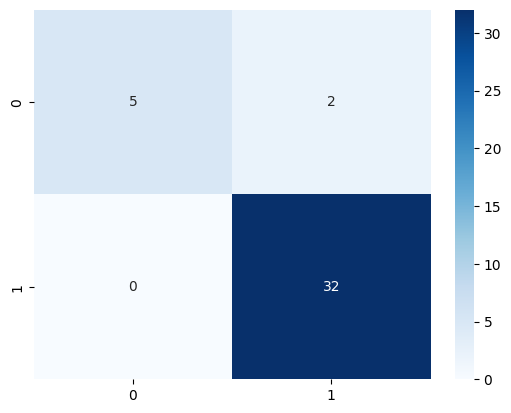

In [31]:
cm = confusion_matrix(y_test,y_pred_ensemble)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')